In [3]:
company = "TSLA"

In [4]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import math
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split
key = 'YN6FQUICKVCVB153'

ts = TimeSeries(key, output_format="pandas")
ti = TechIndicators(key, output_format="pandas")

all_data, abnb_meta_data = ts.get_daily(symbol=company,outputsize="full") #or full

ModuleNotFoundError: No module named 'alpha_vantage'

In [5]:
print(all_data)

NameError: name 'all_data' is not defined

In [52]:
print(abnb_meta_data)

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'TSLA', '3. Last Refreshed': '2022-08-12', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}


In [53]:
stocks = all_data
stocks.head()
stocks["date"] = stocks.index
stocks["datetime"] = pd.to_datetime(stocks.index).map(dt.datetime.toordinal)

max_a = stocks["datetime"].max()
min_a = stocks["datetime"].min()

min_norm = -1
max_norm = 1
stocks['normed'] = (stocks["datetime"]- min_a) *(max_norm - min_norm) / (max_a-min_a) + min_norm
stocks["datetime"] = stocks["datetime"] - min_a

stocks["normed_close"] = stocks["4. close"] / stocks.iloc[-1]["4. close"]
stocks["normed_close"] = np.log(stocks["normed_close"])
print(stocks["normed_close"])

stocks["normed_volume"] = stocks["5. volume"] / stocks.iloc[-1]["5. volume"]
stocks["normed_volume"] = np.log(stocks["normed_volume"])
print(stocks["normed_volume"])

date
2022-08-12    3.629035
2022-08-11    3.583345
2022-08-10    3.609945
2022-08-09    3.571776
2022-08-08    3.596492
                ...   
2010-07-06   -0.394020
2010-07-02   -0.218550
2010-07-01   -0.084237
2010-06-30   -0.002515
2010-06-29    0.000000
Name: normed_close, Length: 3053, dtype: float64
date
2022-08-12    0.347059
2022-08-11    0.220033
2022-08-10    0.522348
2022-08-09    0.426513
2022-08-08    0.568128
                ...   
2010-07-06   -1.005350
2010-07-02   -1.295049
2010-07-01   -0.825638
2010-06-30   -0.087904
2010-06-29    0.000000
Name: normed_volume, Length: 3053, dtype: float64


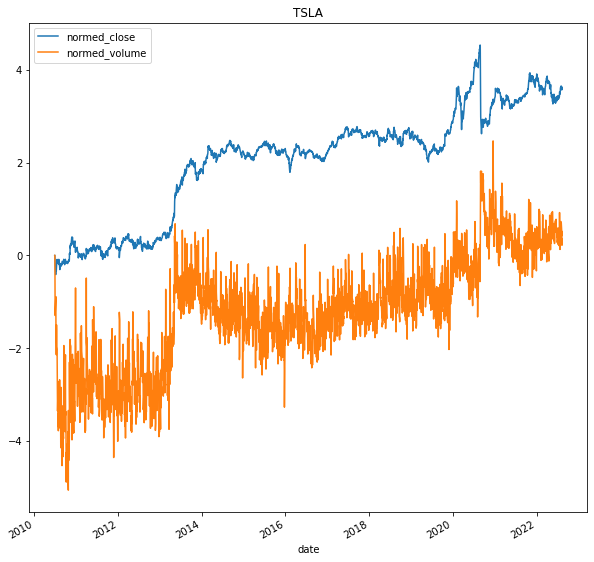

In [54]:
stocks.plot(x="date", y=["normed_close", "normed_volume"],
        kind="line", title=company, figsize=(10, 10))

# display plot
mp.show()

stocks = stocks.drop(columns=['normed_close', 'normed_volume', 'date'])

#sns.regplot(x='datetime',y='normed_close',data=stocks,logistic=False)
#sns.regplot(x='datetime',y='normed_volume',data=stocks,logistic=False)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linear_data = stocks[["datetime","5. volume"]].values
target = stocks["4. close"]
linear_model = LinearRegression()
linear_model.fit(X=linear_data,y=target)
stocks["predicted_close"] = linear_model.predict(linear_data)

mse = mean_squared_error(stocks["4. close"].values,stocks["predicted_close"].values) # float: MSE
r2 = r2_score(stocks["4. close"].values,stocks["predicted_close"].values) # float: R^2 score

# Leave this line here to print the result
print("MSE:", mse, "r^2:", r2)

MSE: 31697.33698941647 r^2: 0.6579712719518802


In [56]:
stocks["net"] = stocks["1. open"] - stocks["4. close"]

stocks["net_transformed"]= np.where(stocks['net'] > 0, 1, 0)
print(stocks["net_transformed"])

target = stocks["net_transformed"]
stocks = stocks.drop("net_transformed",axis=1)

train_data, test_data, train_target, test_target = train_test_split(
    stocks, target, test_size=0.15, random_state=216)

date
2022-08-12    0
2022-08-11    1
2022-08-10    1
2022-08-09    1
2022-08-08    1
             ..
2010-07-06    1
2010-07-02    1
2010-07-01    1
2010-06-30    1
2010-06-29    0
Name: net_transformed, Length: 3053, dtype: int64


accuracy: 0.5087336244541485


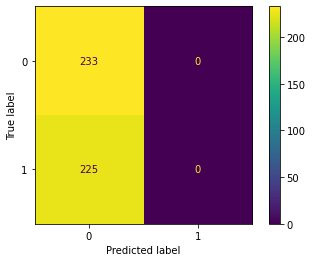

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import utils

train_d = np.array(train_data[["normed","2. high","3. low","5. volume"]])
test_d = np.array(test_data[["normed","2. high","3. low","5. volume"]])

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X=train_d,y=train_target)
prediction = logistic_model.predict(test_d)
score = accuracy_score(test_target,prediction)

metrics.plot_confusion_matrix(logistic_model,test_d,test_target)

# Leave this line here to print the result
print("accuracy:", score)

In [58]:
print(train_data)
print(train_target)

            1. open  2. high    3. low  4. close   5. volume  datetime  \
date                                                                     
2014-06-17   224.11   235.54  222.8500    231.67  13246700.0      1449   
2017-01-06   226.93   230.31  225.4500    229.01   5527893.0      2383   
2012-05-11    32.49    33.44   32.1600     32.25   1221300.0       682   
2010-10-28    21.39    21.50   20.9600     21.19    224200.0       121   
2015-10-02   235.60   247.70  234.9300    247.57   4423982.0      1921   
...             ...      ...       ...       ...         ...       ...   
2014-06-04   204.35   206.26  200.3960    203.99   3427400.0      1436   
2010-08-16    18.45    18.80   18.2616     18.78    485800.0        48   
2019-10-18   260.70   262.80  255.1000    256.95   5749800.0      3398   
2011-05-03    27.38    27.39   26.5000     26.87    913900.0       308   
2017-09-18   380.25   389.61  377.6800    385.00   7149295.0      2638   

              normed  predicted_close

In [59]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Write your code for question 4 here
knn_search = GridSearchCV(estimator=KNeighborsClassifier(),param_grid={'n_neighbors': range(1,30)})
knn_search.fit(train_data,train_target)
n = knn_search.best_params_ 
score = knn_search.score(test_data,test_target)

# Leave this line here to print the result
print("Optimal n_neighors:", n)
print("Accuracy on testing data:", score)

Optimal n_neighors: {'n_neighbors': 22}
Accuracy on testing data: 0.49563318777292575
